In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
# Load the dataset
data = pd.read_csv(r"C:\Users\sanna\Downloads\parkinsons.csv")

In [108]:
# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [109]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['name', 'status']))  # Exclude non-numeric columns
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[1:-1])  # Exclude 'name' and 'status'


In [110]:
# Train-Test Split
X = data_scaled
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Save Preprocessed Data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [112]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [113]:
# Initialize Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [114]:
# Train the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**Model Evaluation**

In [115]:
# Make predictions
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)

In [116]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [117]:

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9038461538461539
Test Accuracy: 0.8717948717948718


**Claasification Report**

In [118]:
from sklearn.metrics import classification_report

In [119]:
# Classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39





**Confusion Matrix**

In [120]:
import matplotlib.pyplot as plt

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [122]:
y_pred = svm_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

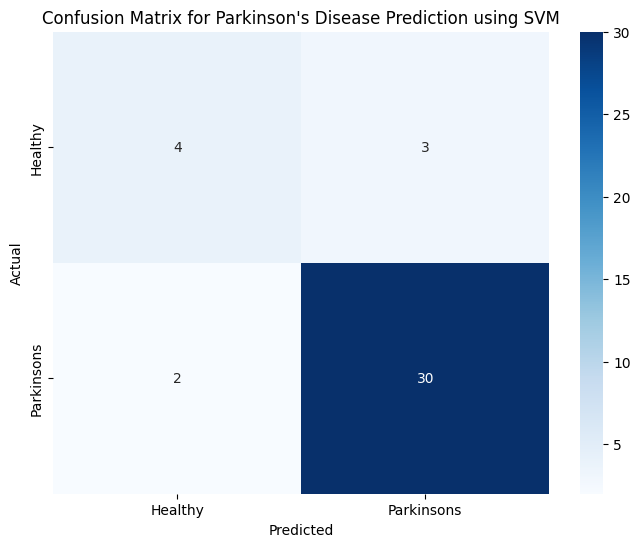

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Parkinson\'s Disease Prediction using SVM')
plt.show()

In [124]:
cm = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

In [125]:
TN, FP, FN, TP = cm.ravel()

In [126]:
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)

In [127]:
print("Confusion Matrix:")
print(cm)
print("\nAccuracy (from confusion matrix):", accuracy)
print("Accuracy (manual calculation):", accuracy_manual)

Confusion Matrix:
[[ 4  3]
 [ 2 30]]

Accuracy (from confusion matrix): 0.8717948717948718
Accuracy (manual calculation): 0.8717948717948718


In [128]:
y_pred_svm_train = svm_classifier.predict(X_train)
y_pred_svm_test = svm_classifier.predict(X_test)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
svm_train_accuracy = accuracy_score(y_train, y_pred_svm_train)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm_test)

In [131]:
print("SVM Train Accuracy:", svm_train_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)


SVM Train Accuracy: 0.9038461538461539
SVM Test Accuracy: 0.8717948717948718


In [132]:
labels = [ 'SVM Test']
accuracies = [ svm_test_accuracy]

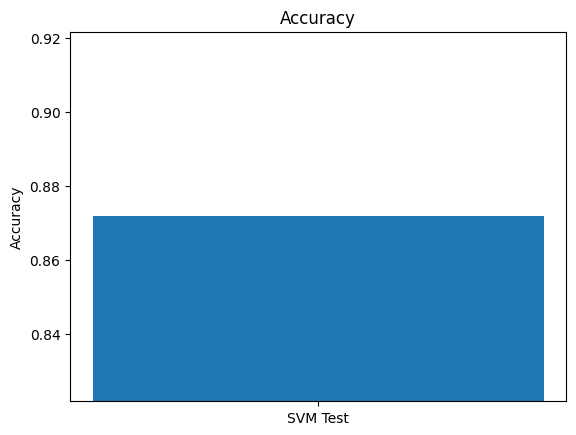

In [133]:
plt.bar(labels, accuracies)
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)   # Set y-axis limits for better visualization
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

**Accuracy,Precision,Recall,Score Comparision**

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [135]:
y_pred_svm_train = svm_classifier.predict(X_train)
y_pred_svm_test = svm_classifier.predict(X_test)


In [136]:
svm_train_accuracy = accuracy_score(y_train, y_pred_svm_train)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm_test)
svm_precision=precision_score(y_test, y_pred_svm_test,average='weighted')
svm_recall=recall_score(y_test, y_pred_svm_test,average='weighted')
svm_f1=f1_score(y_test, y_pred_svm_test,average='weighted')



In [137]:
import numpy as np

In [138]:
models = ['SVM' ]

In [139]:
x = np.arange(len(models))  # the label locations
width = 0.2

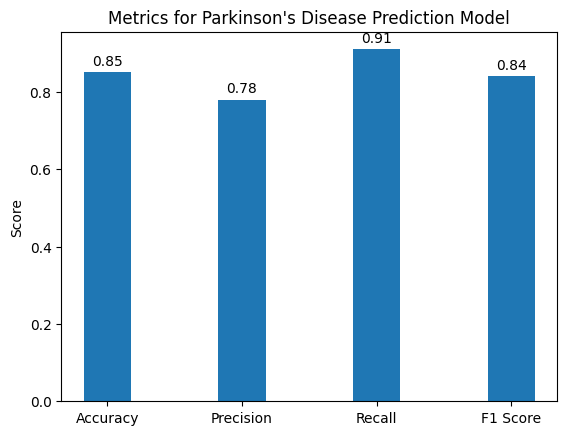

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Example metric values (replace these with your actual values)
accuracy = 0.85
precision = 0.78
recall = 0.91
f1 = 0.84

# Define the metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define the x locations for the bars
x = np.arange(len(metrics))
width = 0.35  # the width of the bars

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars
rects = ax.bar(x, values, width)

# Add labels, title, and grid
ax.set_ylabel('Score')
ax.set_title('Metrics for Parkinson\'s Disease Prediction Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add values on top of the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [142]:
y_pred_svm_train = svm_classifier.predict(X_train)
y_pred_svm_test = svm_classifier.predict(X_test)


In [143]:
from sklearn.ensemble import RandomForestClassifier


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
y_pred_rf_train = rf_classifier.predict(X_train)
y_pred_rf_test = rf_classifier.predict(X_test)

In [147]:
svm_train_accuracy = accuracy_score(y_train, y_pred_svm_train)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm_test)
svm_precision=precision_score(y_test, y_pred_svm_test,average='weighted')
svm_recall=recall_score(y_test, y_pred_svm_test,average='weighted')
svm_f1=f1_score(y_test, y_pred_svm_test,average='weighted')

In [148]:
rf_train_accuracy = accuracy_score(y_train, y_pred_rf_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf_test)
rf_precision = precision_score(y_train, y_pred_rf_train,average='weighted')
rf_recall = recall_score(y_test, y_pred_rf_test,average='weighted')
rf_f1 = f1_score(y_train, y_pred_rf_train,average='weighted')

In [149]:
models = ['SVM', 'Random Forest']
accuracy = [svm_test_accuracy, rf_test_accuracy]
precision = [svm_precision, rf_precision]
recall = [svm_recall, rf_recall]
f1 = [svm_f1, rf_f1]

In [150]:
import numpy as np

In [151]:
x = np.arange(len(models))  # the label locations
width = 0.2

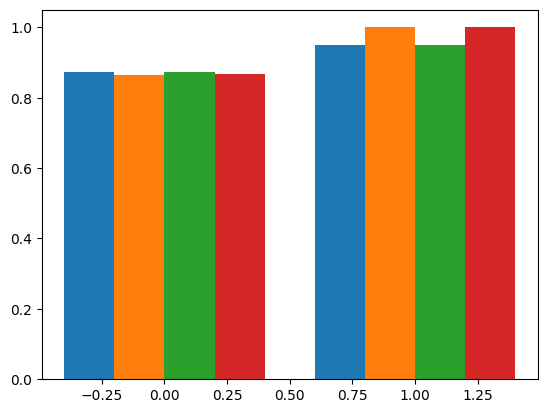

In [152]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')



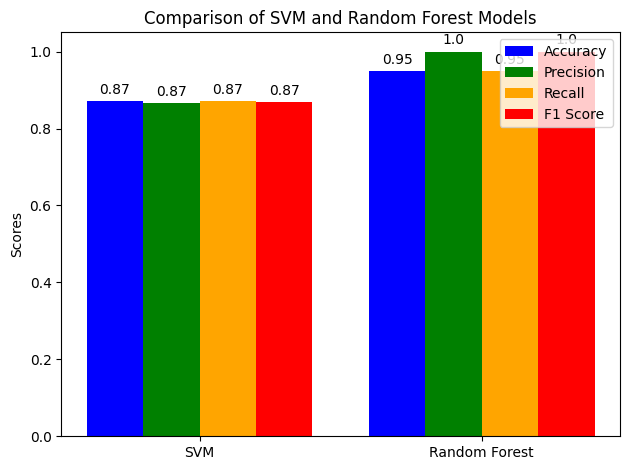

In [153]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'Random Forest']
accuracy = [svm_test_accuracy, rf_test_accuracy]
precision = [svm_precision, rf_precision]
recall = [svm_recall, rf_recall]
f1 = [svm_f1, rf_f1]
x = np.arange(len(models))  # the label locations
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='blue')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='green')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='orange')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score', color='red')

# Add color labels indicating which metric each color represents
legend_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
legend_colors = ['blue', 'green', 'orange', 'red']
ax.legend([plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in legend_colors],
          legend_labels, loc='upper left')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM and Random Forest Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
add_value_labels(rects1)
add_value_labels(rects2)
add_value_labels(rects3)
add_value_labels(rects4)

fig.tight_layout()

plt.show()
